In [1]:
import cv2
import numpy as np

mesh = np.load("../../../results/5 Effective Boxing Combos To Drill In_chunk3/mesh.npy")
file_path = "../../../video_split/5 Effective Boxing Combos To Drill In_chunk3.mp4"

cap = cv2.VideoCapture(file_path)
frames = []  # 각 프레임을 저장할 리스트

if not cap.isOpened():
    print("비디오 파일을 열 수 없습니다.")
else:
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        # 각 프레임은 이미 numpy 배열이므로 그대로 리스트에 추가
        frames.append(frame)
    cap.release()
    cv2.destroyAllWindows()

# 리스트를 numpy 배열로 변환 (shape: (frame 개수, 높이, 너비, 채널))
frames_np = np.array(frames)
print("추출된 프레임 개수:", frames_np.shape[0])


추출된 프레임 개수: 500


In [2]:
from silhouette_triangle_generator import *
from mesh_rendering import render_mesh_to_image_silhouette

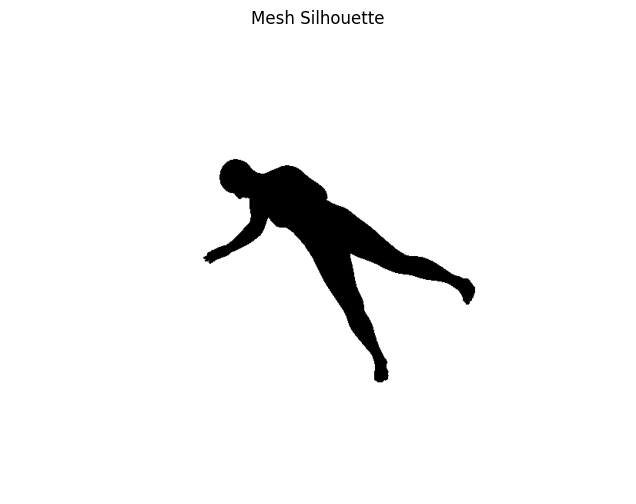

In [3]:
silhouette = render_mesh_to_image_silhouette(mesh[0], draw_face=True,
                                             elev=90, azim=90, roll=45,
                                             vertical_axis='z')

# 결과 확인 (Matplotlib로 시각화)
plt.figure(figsize=(8, 6))
plt.imshow(silhouette)
plt.axis('off')
plt.title("Mesh Silhouette")
plt.show()

In [4]:
from segmentation import segment_image, draw_top_segment

from transformers import AutoImageProcessor, Mask2FormerForUniversalSegmentation

processor = AutoImageProcessor.from_pretrained("facebook/mask2former-swin-base-coco-panoptic")
model = Mask2FormerForUniversalSegmentation.from_pretrained("facebook/mask2former-swin-base-coco-panoptic")
inputs = processor(images=frames_np[0], return_tensors="pt")

segmentation_result = segment_image(frames_np[0], processor, model)
print(segmentation_result)

masks = draw_top_segment(segmentation_result[0], frames_np[0])

d:\pose_prediction\data_agent\Video_Understanding\mmaction\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
d:\pose_prediction\data_agent\Video_Understanding\mmaction\lib\site-packages\transformers\utils\deprecation.py:165: UserWarning: The following named arguments are not valid for `Mask2FormerImageProcessor.__init__` and were ignored: '_max_size'
  return func(*args, **kwargs)
`label_ids_to_fuse` unset. No instance will be fused.


[{'segmentation': tensor([[5, 5, 5,  ..., 5, 5, 5],
        [5, 5, 5,  ..., 5, 5, 5],
        [5, 5, 5,  ..., 5, 5, 5],
        ...,
        [6, 6, 6,  ..., 6, 6, 6],
        [6, 6, 6,  ..., 6, 6, 6],
        [6, 6, 6,  ..., 6, 6, 6]], dtype=torch.int32), 'segments_info': [{'id': 1, 'label_id': 37, 'was_fused': False, 'score': 0.846571}, {'id': 2, 'label_id': 132, 'was_fused': False, 'score': 0.659431}, {'id': 3, 'label_id': 115, 'was_fused': False, 'score': 0.850173}, {'id': 4, 'label_id': 0, 'was_fused': False, 'score': 0.99948}, {'id': 5, 'label_id': 131, 'was_fused': False, 'score': 0.965084}, {'id': 6, 'label_id': 122, 'was_fused': False, 'score': 0.985973}]}]


In [5]:
mask_polygons=get_approximated_polygons(masks)
silhouette_polygons=get_approximated_polygons(silhouette)

mask_polygons=get_largest_polygon(mask_polygons)
silhouette_polygons=get_largest_polygon(silhouette_polygons)

mask_radials=get_radial_list(mask_polygons)
silhouette_radials=get_radial_list(silhouette_polygons)

loss = dtw_distance_1d(mask_radials, silhouette_radials)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


두 segmentation 계수 간 DTW Loss: 2417.9666638521326


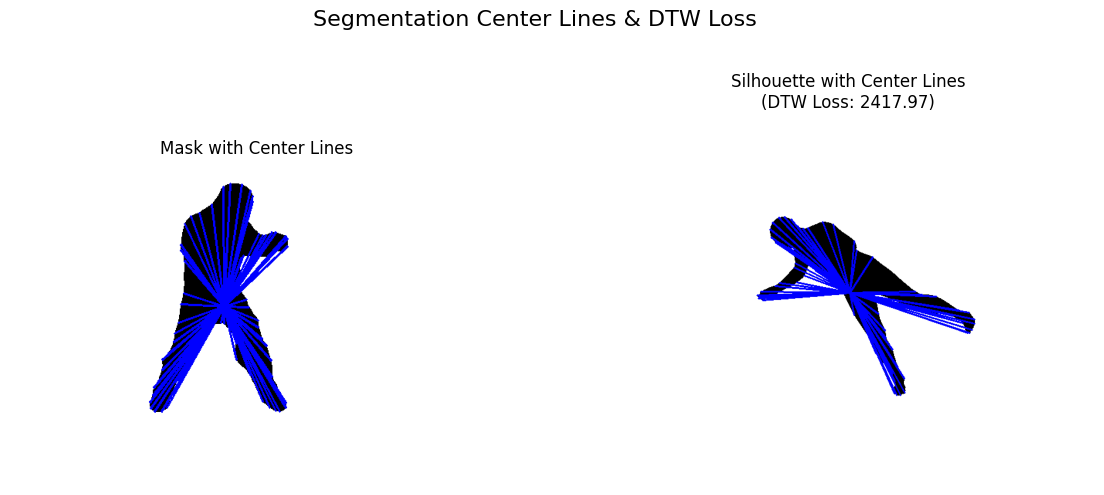

In [6]:
visualize_segmentation_center_lines(masks, silhouette)

In [7]:
loss

2417.9666638521326